In [1]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

def url_to_image(url):
    print("downloading %s" % (url))
    return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/bookpage1.jpg"
img = url_to_image(url)
grayscaled = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)



downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/bookpage1.jpg


In [22]:
def cv2_imshow(img, cmap=None):
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 15))
    
    if cmap:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=cmap)

Box filter

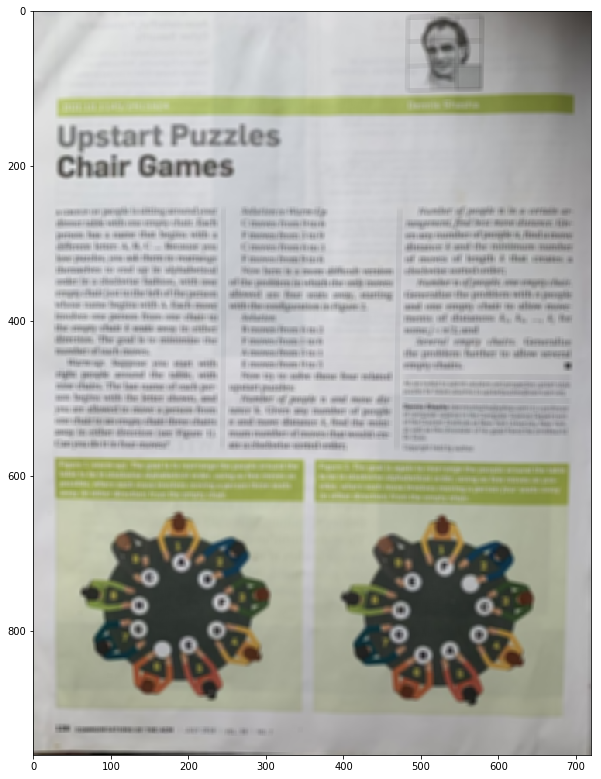

In [23]:
kernel = np.ones((7,7),np.float32)/49
im1 = cv2.filter2D(img,-1,kernel)
cv2_imshow(im1)

Gaussian Blur

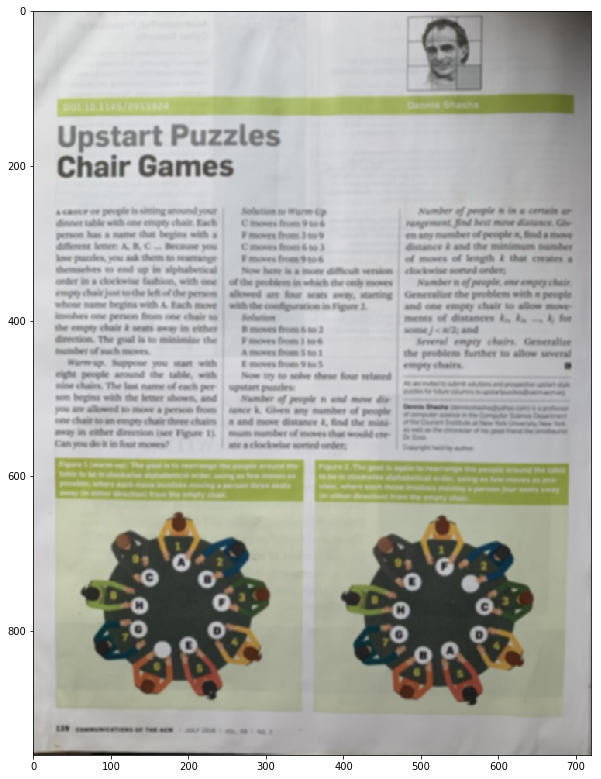

In [24]:
im2 = cv2.GaussianBlur(img,(7,7),0)
cv2_imshow(im2)

Білатеральний фільтр

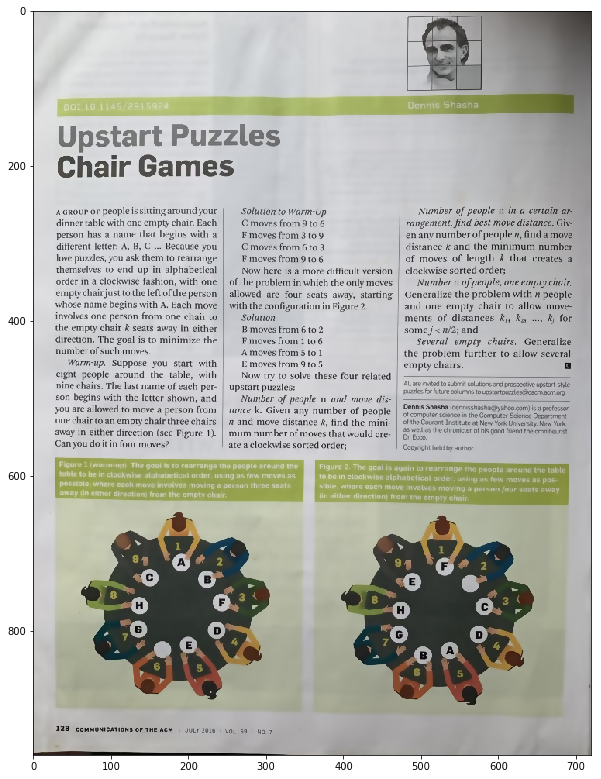

In [25]:
im3 = cv2.bilateralFilter(img,9,75,75)
cv2_imshow(im3)

Поріг

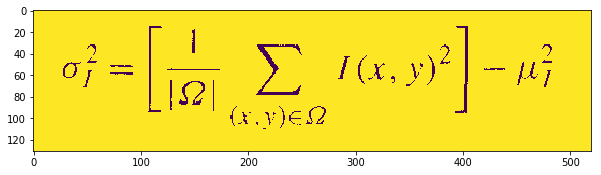

In [28]:
retval, threshold = cv2.threshold(grayscaled, 24, 255, cv2.THRESH_BINARY)
cv2_imshow(threshold, cmap='gray')

Інверсія

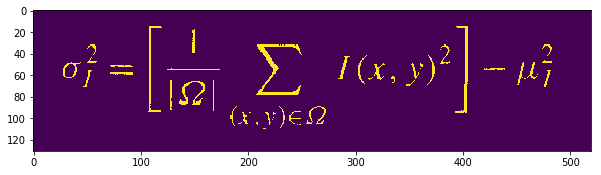

In [27]:
t_inv = (255-threshold)
cv2_imshow(t_inv)

  

Ерозія і дилатація

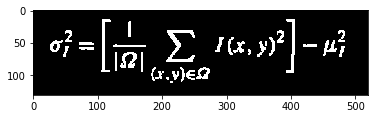

In [17]:
kernel = np.ones((3,3), np.uint8) 
img_erosion = cv2.erode(threshold, kernel, iterations=1) 
img_dilation = cv2.dilate(t_inv, kernel, iterations=1) 
cv2_imshow(img_erosion)
cv2_imshow(img_dilation)

## Task 1

### Text separation

In [120]:
img = cv2.imread('./images/text1.jpg')

<Figure size 1080x720 with 0 Axes>

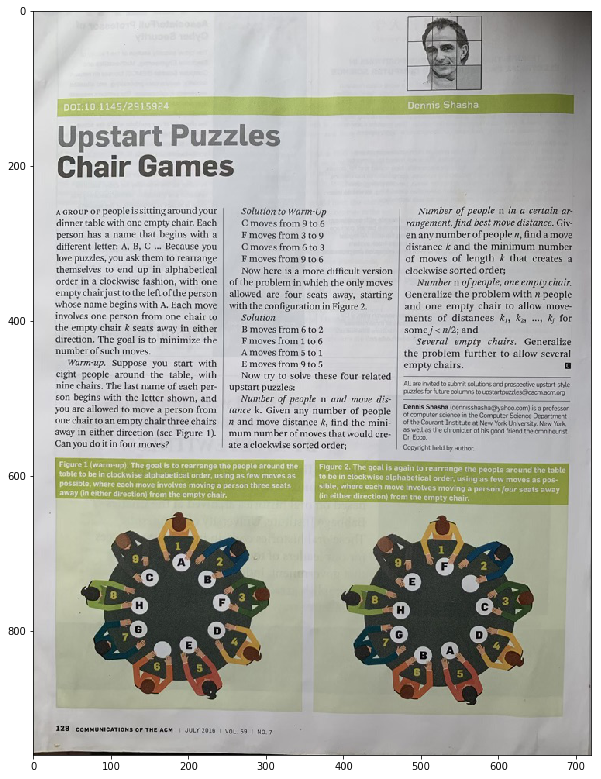

In [121]:
plt.figure(figsize=(15, 10))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img)

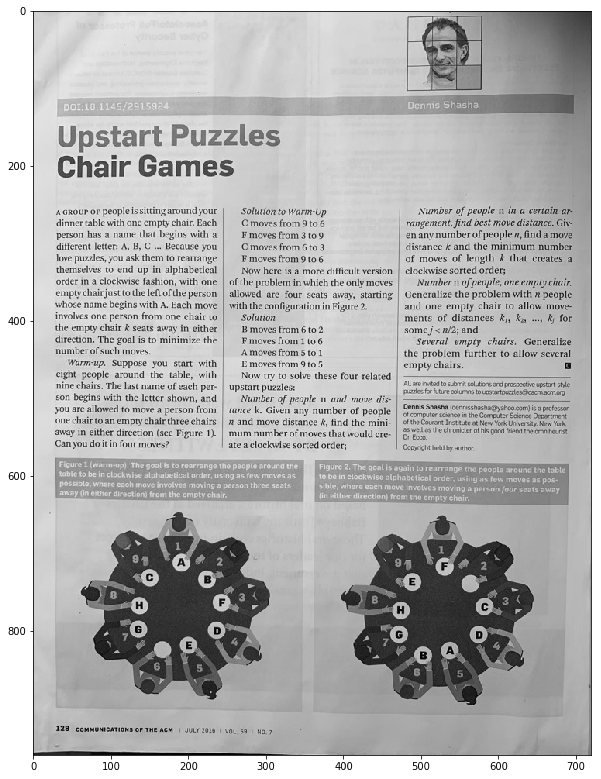

In [122]:
# convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(10, 15))
plt.imshow(gray_img, cmap='gray')

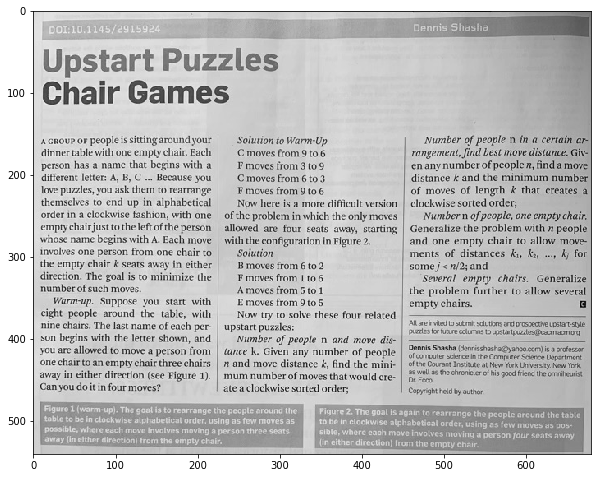

In [123]:
cropped_image = gray_img[100:640, 20:700,]
plt.figure(figsize=(10, 15))
plt.imshow(cropped_image, cmap='gray')

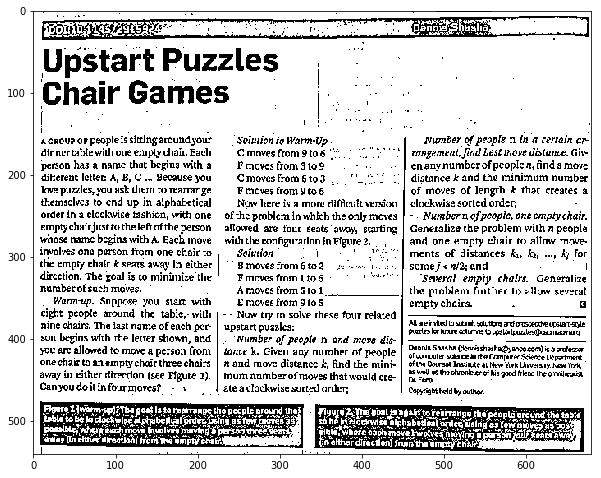

In [124]:
threshold = cv2.adaptiveThreshold(cropped_image, 255,
                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv2.THRESH_BINARY, 15, 5)
plt.figure(figsize=(10, 15))
plt.imshow(threshold, cmap='gray')

In [125]:
edges = cv2.Canny(cropped_image, 100, 200)

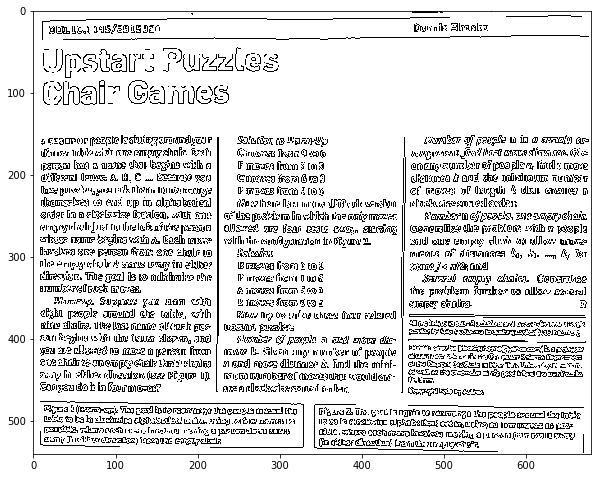

In [126]:
plt.figure(figsize=(10, 15))
plt.imshow(255 -edges, cmap='gray')

In [579]:
def plot_gray(image):
    plt.figure(figsize=(15, 15))
    plt.imshow(image, cmap='gray')

In [138]:
def find_text(gray_img):
    img_gray = gray_img.copy()
    ele_size=(18,20)

    img_sobel = cv2.Sobel(img_gray, cv2.CV_8U,1,0)
    img_threshold = cv2.threshold(img_sobel,0,255,cv2.THRESH_OTSU+cv2.THRESH_BINARY)
    element = cv2.getStructuringElement(cv2.MORPH_RECT,ele_size)
    img_threshold = cv2.morphologyEx(img_threshold[1],cv2.MORPH_CLOSE,element)
    contours = cv2.findContours(img_threshold,0,1)
    Rect = [cv2.boundingRect(i) for i in contours[1] if i.shape[0]>100]
    RectP = [(int(i[0]-i[2]*0.08),int(i[1]-i[3]*0.08),int(i[0]+i[2]*1.1),int(i[1]+i[3]*1.1)) for i in Rect]

    for i in RectP[1:2]:
        cv2.rectangle(img_gray,i[:2],i[2:],(0,0,255))
        
    plot_gray(img_gray)

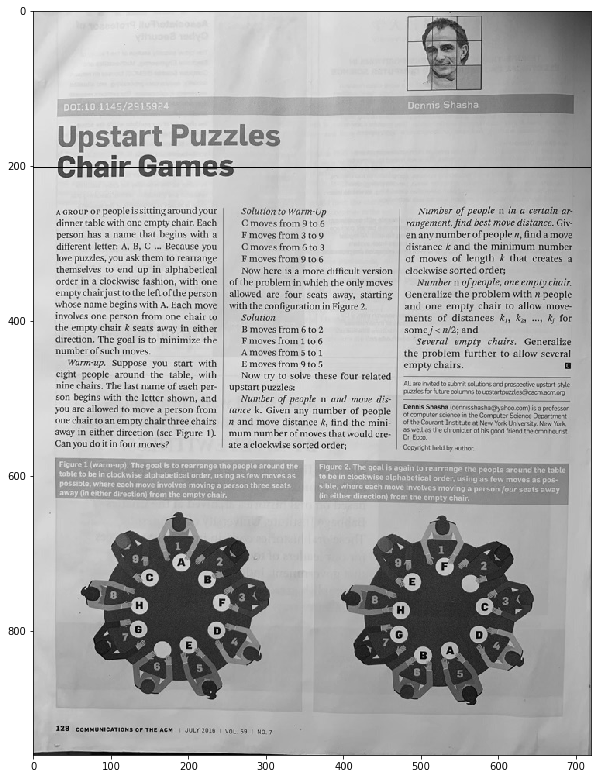

In [139]:
find_text(gray_img)

## image 4

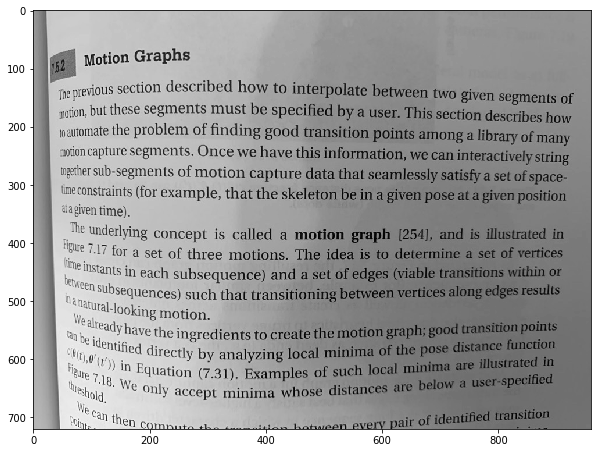

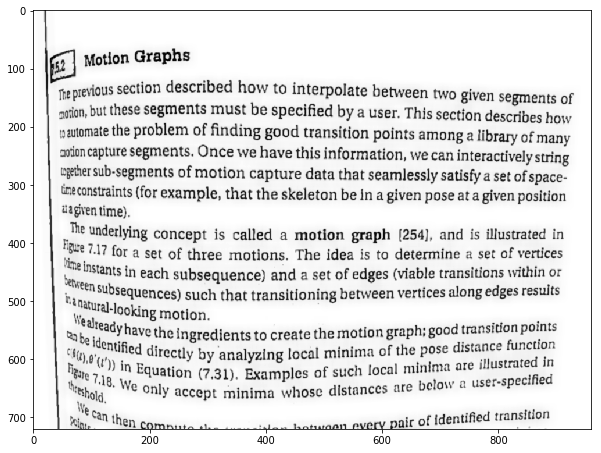

In [367]:
img4 = cv2.imread('./images/text4.jpg')
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

# convert to grayscale
gray_img_4 = cv2.cvtColor(img4, cv2.COLOR_RGB2GRAY)
plot_gray(gray_img_4)
gray_img_4 = cv2.GaussianBlur(gray_img_4, (3,3), 0.7)

# threshold
threshold = cv2.adaptiveThreshold(
    gray_img_4, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 15, 7)
    
kernel = np.array([1, 1], np.uint8)
eroded = cv2.erode(threshold, kernel, iterations=1) 
denoised = cv2.fastNlMeansDenoising(eroded, None, 150, 3, 30)
plot_gray(denoised)
    
    

## image 5

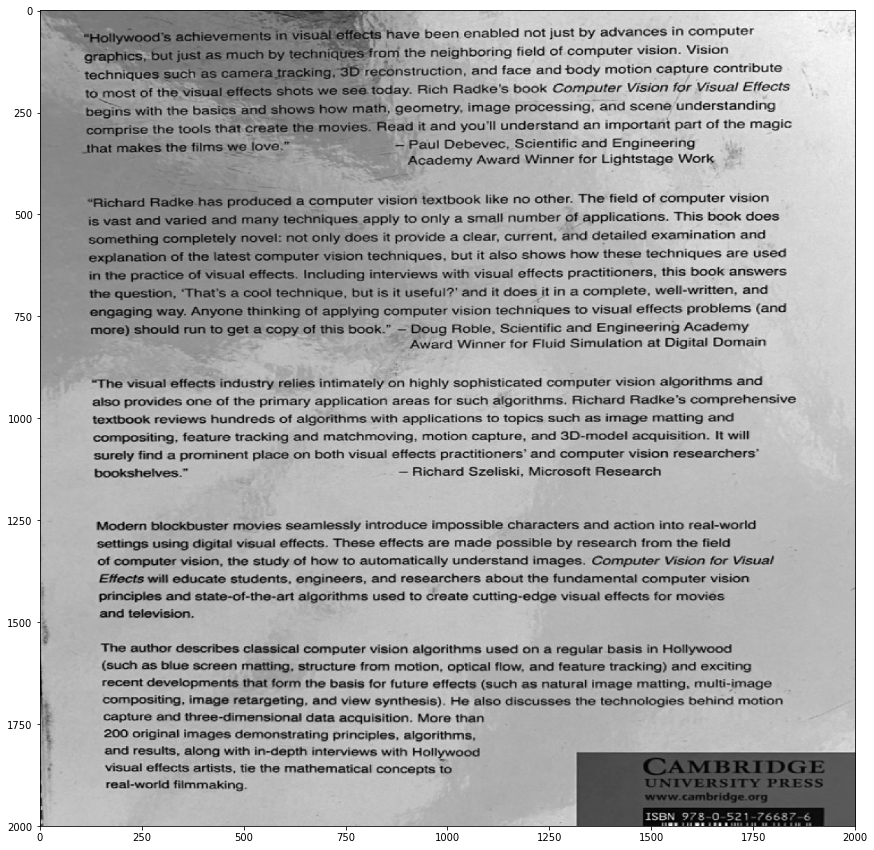

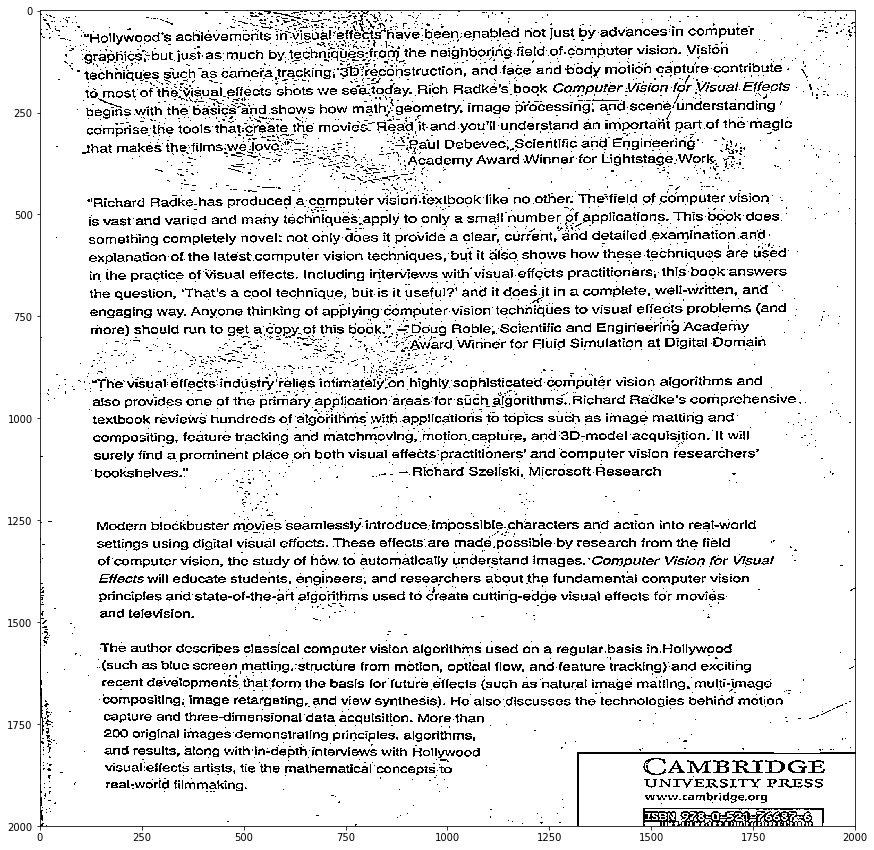

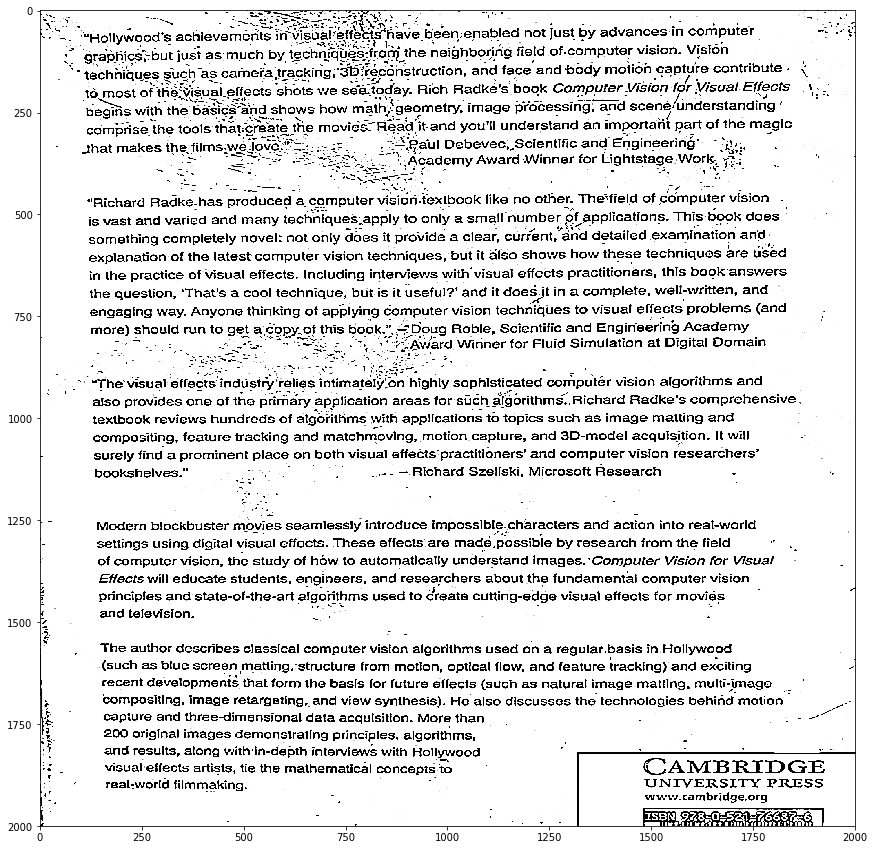

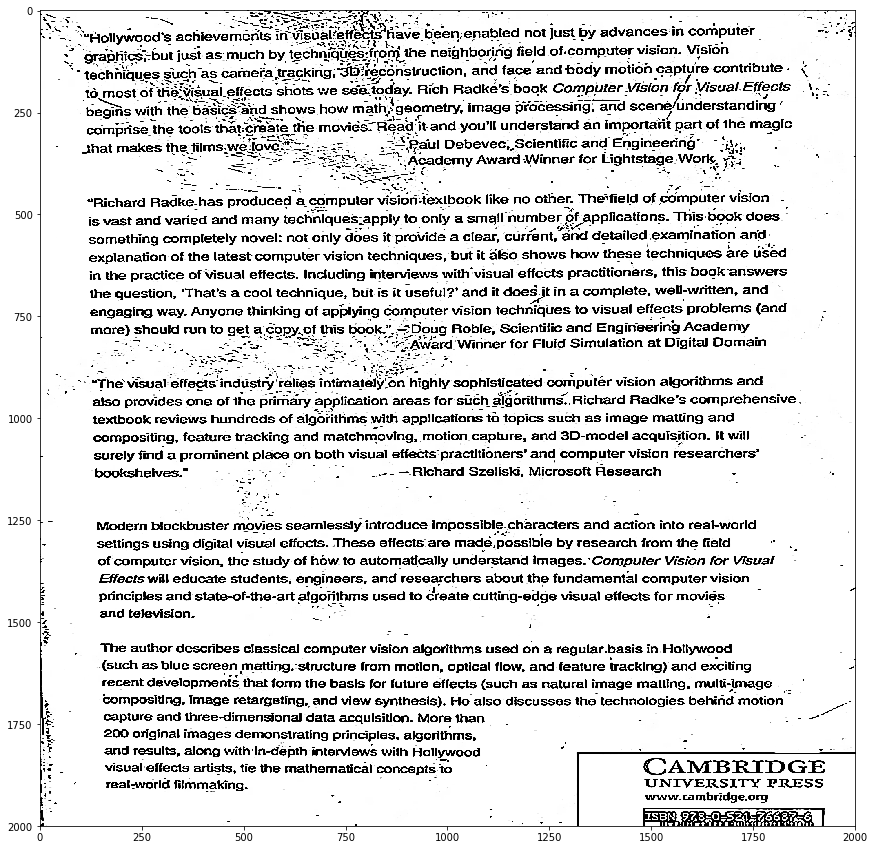

In [583]:
img5 = cv2.imread('./images/text5.jpg')
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

# convert to grayscale
gray_img_5 = cv2.cvtColor(img5, cv2.COLOR_RGB2GRAY)
gray_img_5 = cv2.resize(gray_img_5, (2000, 2000))
# invert image
gray_img_5 = 255 - gray_img_5
plot_gray(gray_img_5)


gray_img_5 = cv2.GaussianBlur(gray_img_5, (3, 3), 0)
# gray_img_5 = cv2.medianBlur(gray_img_5, 5)

# threshold
threshold = cv2.adaptiveThreshold(
    gray_img_5, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 9, 3)
plot_gray(threshold)

# image1 = cv2.GaussianBlur(threshold,(3,3),0)
# ret, image2 = cv2.threshold(image1, 130, 255, cv2.THRESH_BINARY)
# plot_gray(image2)
# kernel = np.ones([2, 2], np.uint8)
# image1 = cv2.erode(threshold, kernel, iterations=1)
# plot_gray(image1)


denoised = cv2.fastNlMeansDenoising(threshold, None, 40, 7, 21)
plot_gray(denoised)
kernel = np.array([[1, 1]], np.uint8)
image1 = cv2.erode(denoised, kernel, iterations=1)
plot_gray(image1)

    

## image 6

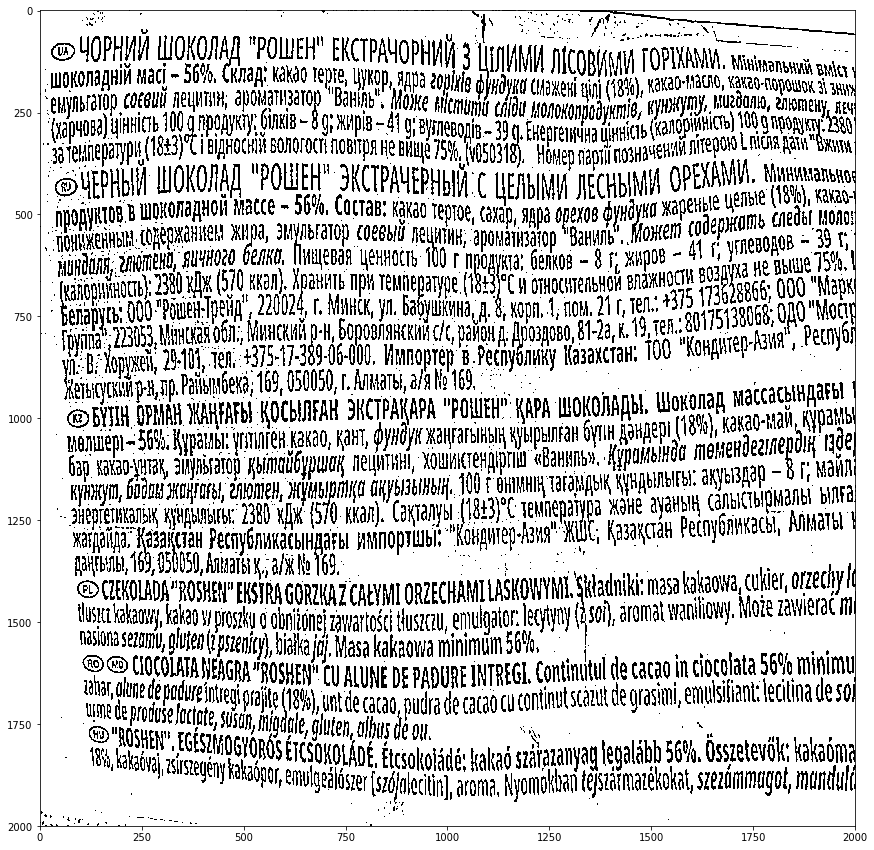

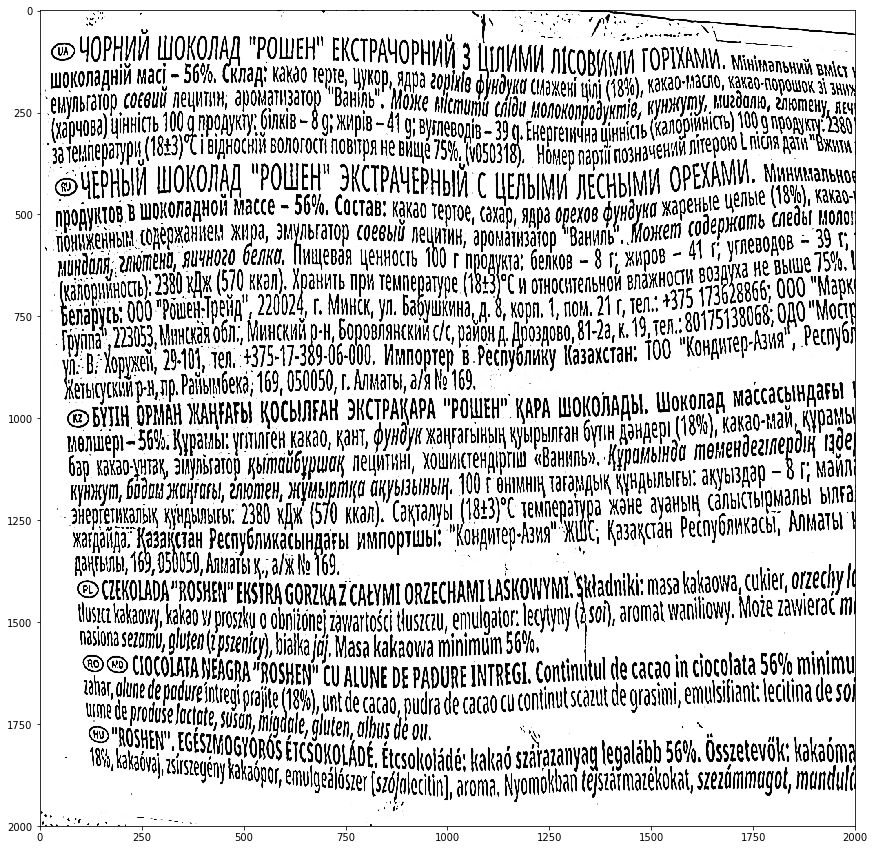

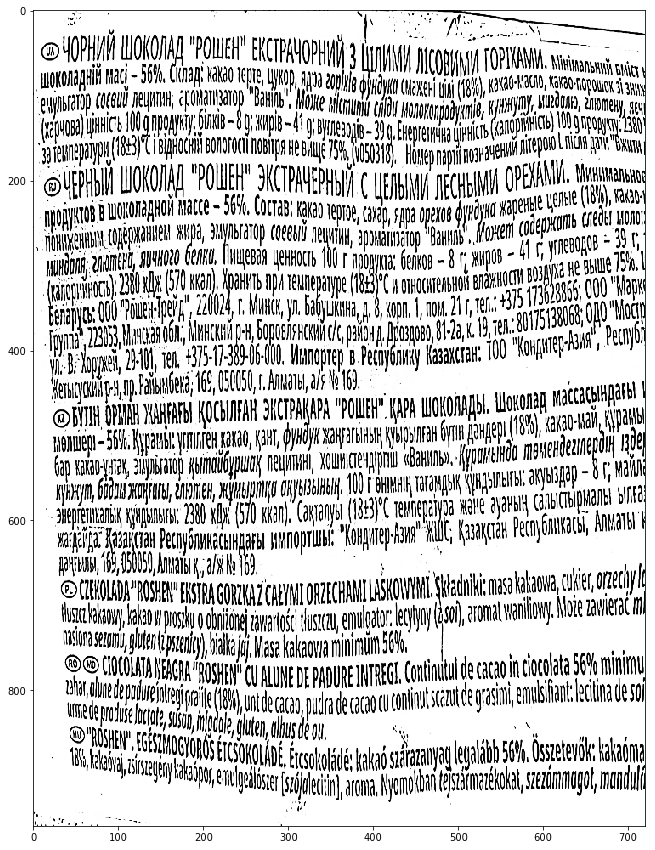

In [585]:
img6 = cv2.imread('./images/text6.jpg')
img6 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)

# convert to grayscale
gray_img_6 = cv2.cvtColor(img6, cv2.COLOR_RGB2GRAY)

gray_img_shape = gray_img_6.shape

gray_img_6 = cv2.resize(gray_img_6, (2000, 2000))
# invert image
gray_img_6 = 255 - gray_img_6

gray_img_6 = cv2.GaussianBlur(gray_img_6, (3, 3), 0)

# threshold
threshold = cv2.adaptiveThreshold(
    gray_img_6, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 15, 5)
# plot_gray(threshold)

# image1 = cv2.GaussianBlur(threshold,(3,3),0)
# ret, image2 = cv2.threshold(image1, 130, 255, cv2.THRESH_BINARY)
# plot_gray(image2)
kernel = np.ones((1, 1),np.uint8)
threshold = cv2.dilate(threshold, kernel)
plot_gray(threshold)


denoised = cv2.fastNlMeansDenoising(threshold, None, 50, 7, 21)
plot_gray(denoised)

denoised = cv2.resize(denoised, gray_img_shape)
plot_gray(denoised)